In [2]:
# Autoreload extension for Jupyter notebooks
%load_ext autoreload
%autoreload 2

# Manual reload
from importlib import reload

# Magic commands for inline plotting and high-res figures
%matplotlib inline
%config InlineBackend.figure_format ='retina'

# Standard library imports
import os
import sys
import pickle
from pprint import pprint

# Third-party library imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from jupyterthemes import jtplot
from tqdm import tqdm

# Custom modules (if needed)
# module_path = os.path.join(os.path.expanduser('~'), 'CustomModules')
# sys.path.append(module_path)
# from telegram_notify import notify
# from plotting_tools import error_band_plot, get_ax_data_range

# Add the parent directory to sys.path (if needed)
from pathlib import Path
sys.path.append(str(Path(os.getcwd()).parent))

# Other modules (if needed)
from src.color_code_stim.color_code import ColorCode

# Pandas and plotting configurations
pd.set_option('display.max_rows', 1000)
idx = pd.IndexSlice

jtplot.style(context='paper', theme='grade3', grid=False, ticks=True)
DFT_FIG_WIDTH_WIDE = 11
DFT_FIG_WIDTH = 5.3
COLORS = plt.get_cmap('tab10')
# Choose in ['Pastel1', 'Pastel2', 'Paired', 'Accent', 'Dark2', 'Set1', 'Set2', 'Set3', 
# 'tab10', 'tab20', 'tab20b', 'tab20c']

# Utility functions
def write_pickle(path, obj):
    with open(path, 'wb') as f:
        pickle.dump(obj, f)

def read_pickle(path):
    with open(path, 'rb') as f:
        obj = pickle.load(f)
    return obj

In [141]:
def get_id(target):
    return int(str(target)[1:])

In [12]:
cc = ColorCode(
    circuit_type="cult+growing",
    d=5,
    d2=7,
    rounds=1,
    p_circuit=1e-3,
    comparative_decoding=True,
    perfect_init_final=True,
    remove_non_edge_like_errors=True,
)

In [17]:
cc.Hs_decomposed['r'][1].shape

(265, 149)

In [13]:
det, obs = cc.sample(1000)
preds, extra_outputs = cc.decode(det, full_output=True)
accepted = extra_outputs["accepted"]
obs = obs[accepted]
fails = obs ^ preds
print(len(fails))
fails.sum() / len(fails)

AssertionError: Number of errors in second-round DEMs should be the same for all colors. Found [149, 170, 144].

In [586]:
# Create a dataframe to show failure rate for samples with logical gap < c
import pandas as pd
import numpy as np

gaps = extra_outputs["logical_gaps"]

# Ensure gaps and fails have the same length
assert len(gaps) == len(fails), "Gaps and fails arrays must have the same length"

# Create threshold values from 0 to 30 with 0.1 intervals
thresholds = np.arange(0, 30.1, 0.1)

# Calculate failure rates for each threshold
failure_rates = []
abort_rates = []
for c in thresholds:
    # Get samples where logical gap < c
    mask = gaps > c
    if mask.sum() > 0:  # Avoid division by zero
        failure_rate = fails[mask].sum() / mask.sum()
    else:
        failure_rate = np.nan
    abort_rate = len(fails[mask]) / len(fails)
    failure_rates.append(failure_rate)
    abort_rates.append(abort_rate)
# Create dataframe
df_failure_rates = pd.DataFrame(
    {
        "threshold_c": thresholds,
        "failure_rate": failure_rates,
        "abort_rate": abort_rates,
    }
)

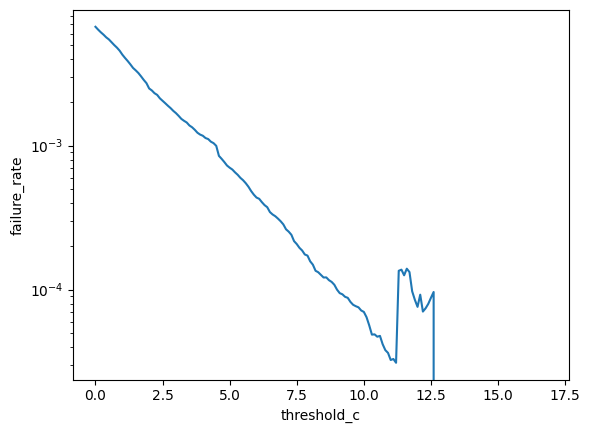

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.lineplot(df_failure_rates, x="threshold_c", y="failure_rate")
plt.yscale("log")

<Axes: xlabel='threshold_c', ylabel='abort_rate'>

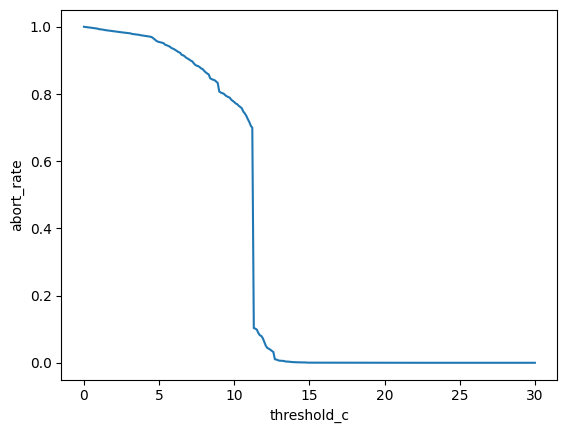

In [588]:
sns.lineplot(df_failure_rates, x="threshold_c", y="abort_rate")

In [570]:
reload(ccs)
cc2 = ccs.ColorCode(
    shape="growing",
    d=3,
    d2=5,
    rounds=5,
    p_circuit=1e-3,
    temp_bdry_type="y",
    comparative_decoding=False,
    perfect_init_final=True,
)

In [571]:
det, obs = cc2.sample(100_000)
preds, extra_outputs = cc2.decode(det, full_output=True)
fails = obs ^ preds
fails.sum() / len(fails)

0.0101